# 1. Introduction and Objectives

In this notebook, we will perform various data analytics exercises to practice key skills in data analysis. The objectives include data loading, cleaning, exploratory data analysis (EDA), visualization, statistical analysis, and predictive modeling.

In [61]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import seaborn as sns
from scipy.stats import ttest_ind
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Data Cleaning and Preparation

In [62]:
# Load the dataset
file_path = 'synthetic_data_new (2).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data

,Entity ID,Annual Clients,Infraction Type,Infraction Timeline,Public Complaints,Sentiment Analysis,Inspection Results,Total Risk Score,Risk Category
0,E0000,34,NaN,NaN,Minor,NaN,Pass,7,Moderate
1,E0001,91,NaN,NaN,NaN,NaN,Fail,7,Moderate
2,E0002,191,NaN,NaN,NaN,NaN,Pass,6,Low
3,E0003,143,Minor,NaN,NaN,NaN,Pass,7,Moderate
4,E0004,38,NaN,NaN,NaN,NaN,Pass,6,Low
...,...,...,...,...,...,...,...,...,...
4995,E4995,637,Major,Within past year,Major,Flagged,Fail,16,High
4996,E4996,803,Major,Within past year,Major,Flagged,NaN,17,High
4997,E4997,657,NaN,Within past year,Major,Flagged,Pass,13,High
4998,E4998,721,Major,Within past year,Major,Flagged,Fail,16,High


In [63]:
# Get basic information about the dataset
data.info()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Entity ID            5000 non-null   object
 1   Annual Clients       5000 non-null   int64 
 2   Infraction Type      797 non-null    object
 3   Infraction Timeline  832 non-null    object
 4   Public Complaints    830 non-null    object
 5   Sentiment Analysis   1194 non-null   object
 6   Inspection Results   4700 non-null   object
 7   Total Risk Score     5000 non-null   int64 
 8   Risk Category        5000 non-null   object
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


,Annual Clients,Total Risk Score
count,5000.000000,5000.00000
mean,149.333200,7.31680
std,161.689007,2.18664
min,11.000000,6.00000
25%,63.000000,6.00000
50%,115.000000,7.00000
75%,167.000000,8.00000
max,996.000000,17.00000


In [64]:
# Check for missing values
missing_values = data.isnull().sum()

# Drop or impute missing values (example: dropping rows with missing values)
data_cleaned = data.dropna()

# Alternatively, impute missing values (example: fill with mean)
# data_cleaned = data.fillna(data.mean())

# Verify missing values are handled
data_cleaned.isnull().sum()

,0
Entity ID,0
Annual Clients,0
Infraction Type,0
Infraction Timeline,0
Public Complaints,0
Sentiment Analysis,0
Inspection Results,0
Total Risk Score,0
Risk Category,0


In [65]:
# Example: Converting categorical columns to numeric
categorical_columns = ['Infraction Type', 'Infraction Timeline',
       'Public Complaints', 'Sentiment Analysis', 'Inspection Results',
       'Risk Category']  # replace with actual column names
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].astype('category').cat.codes

# Example: Normalizing numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['Annual Clients', 'Total Risk Score']  # replace with actual column names
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])


<ipython-input-65-fa57eaab5920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].astype('category').cat.codes
<ipython-input-65-fa57eaab5920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].astype('category').cat.codes
<ipython-input-65-fa57eaab5920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# 3. Exploratory Data Analysis (EDA)

In [66]:
# Calculate correlation matrix
correlation_matrix = data_cleaned[numeric_columns].corr()

# Display correlation matrix
correlation_matrix

,Annual Clients,Total Risk Score
Annual Clients,1.000000,0.695145
Total Risk Score,0.695145,1.000000


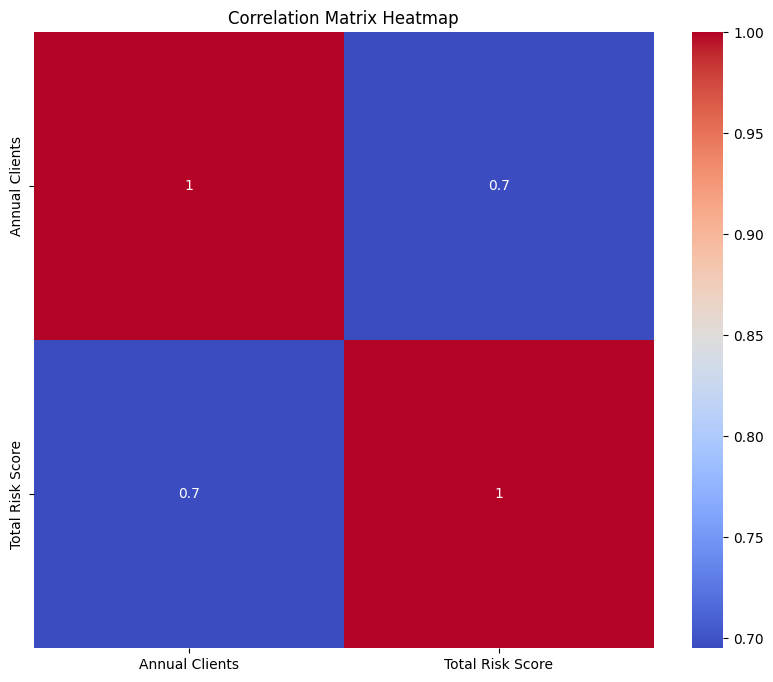

In [67]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


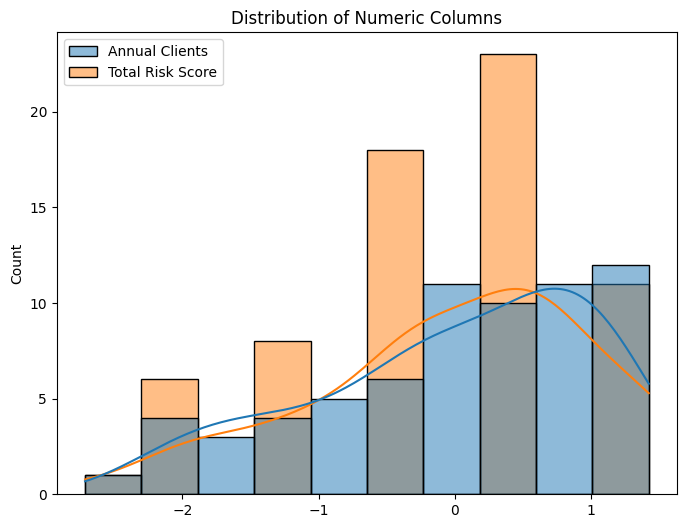

In [68]:
# Histogram for a numeric column
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned[numeric_columns], kde=True)
plt.title('Distribution of Numeric Columns')
plt.show()


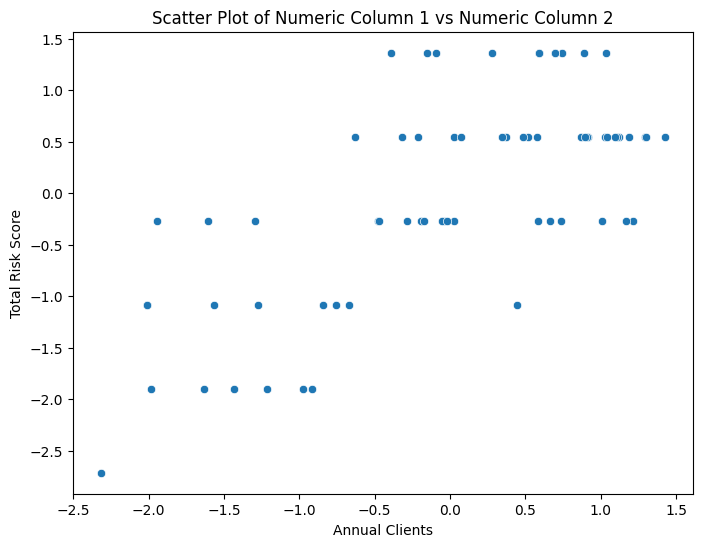

In [69]:
# Scatter plot for two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Clients', y='Total Risk Score', data=data_cleaned)
plt.title('Scatter Plot of Numeric Column 1 vs Numeric Column 2')
plt.show()

# Predictive Modeling [OPTIONAL]

Template code shared below.

In [70]:
# Split data into training and testing sets
'''X = data_cleaned[['numeric_column1', 'numeric_column2']]
y = data_cleaned['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse
'''

"X = data_cleaned[['numeric_column1', 'numeric_column2']]\ny = data_cleaned['target_column']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Train the model\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\n# Predict on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nmse\n"

In [71]:
'''summary = {
    'Missing Values': missing_values,
    'Correlation Matrix': correlation_matrix,
    'Model Mean Squared Error': mse
}

summary'''

"summary = {\n    'Missing Values': missing_values,\n    'Correlation Matrix': correlation_matrix,\n    'Model Mean Squared Error': mse\n}\n\nsummary"

# Leading Questions

How many entities failed the inspection and has infraction within the past 3 years ?

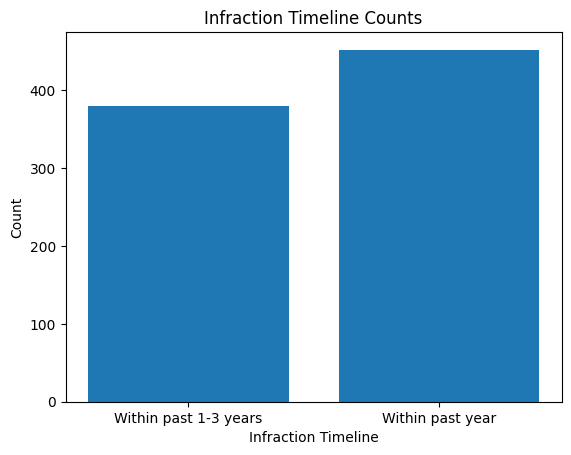

Infraction Timeline
Within past 1-3 years    380
Within past year         452
dtype: int64


'Number of infractions within the past year and within the past 1-3 years. We can conclude that more infractions have happened within the past year than within the past 1-3 years'

In [153]:
# Share the working code here, and explain your reasoning behind

condition = (data['Infraction Timeline'] == 'Within past 1-3 years') & (data['Inspection Results'] == 'Fail') | (data['Infraction Timeline'] == 'Within past 1-3 years') & (data['Inspection Results'] == 'Pass')

#Group the column you want
infraction_timeline_counts = data.groupby('Infraction Timeline').size()
results_counts = data.groupby('Inspection Results').size()
condition_counts = data[condition].groupby('Inspection Results').size()

#Plot the first graph
plt.bar(infraction_timeline_counts.index, infraction_timeline_counts.values)
plt.xlabel('Infraction Timeline')
plt.ylabel('Count')
plt.title('Infraction Timeline Counts')
plt.show()
print(infraction_timeline_counts)

'''Number of infractions within the past year and within the past 1-3 years. We can conclude that more infractions have happened within the past year than within the past 1-3 years'''





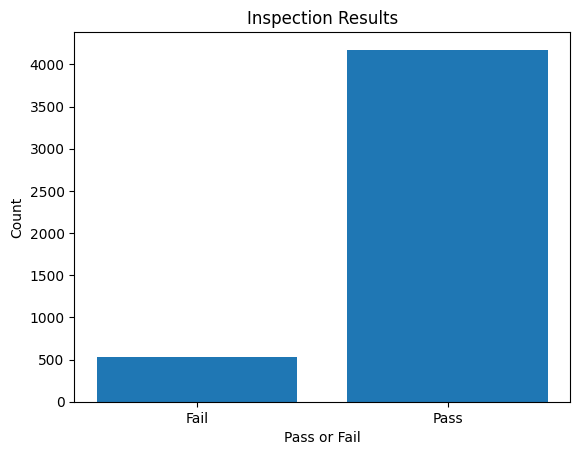

Inspection Results
Fail     526
Pass    4174
dtype: int64


' Inspection Results that are total with no date restrictions'

In [149]:
plt.bar(results_counts.index, results_counts.values)
plt.xlabel('Pass or Fail')
plt.ylabel('Count')
plt.title('Inspection Results')
plt.show()
print(results_counts)
''' Inspection Results that are total with no date restrictions, just total fails and total passes'''

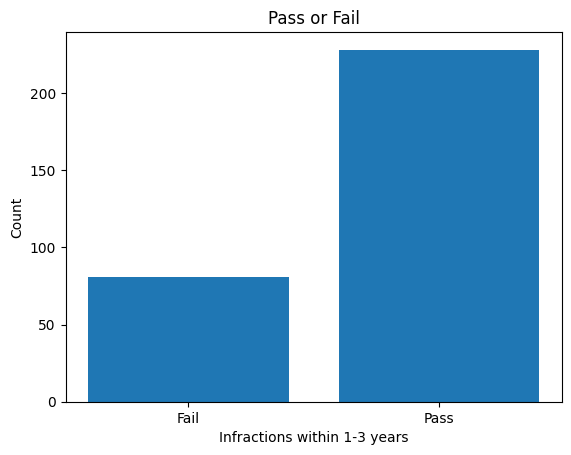

Inspection Results
Fail     81
Pass    228
dtype: int64


'Number of infractions that passed or failed within the past 1-3 years. We can comfortably conclude that more infractions passed than failed.'

In [154]:
plt.bar(condition_counts.index, condition_counts.values)
plt.xlabel('Infractions within 1-3 years')
plt.ylabel('Count')
plt.title('Pass or Fail')
plt.show()
print(condition_counts)

'''Number of infractions that passed or failed within the past 1-3 years. We can comfortably conclude that more infractions passed than failed.'''

How does the annual clients correlate with the risk category and risk score ?

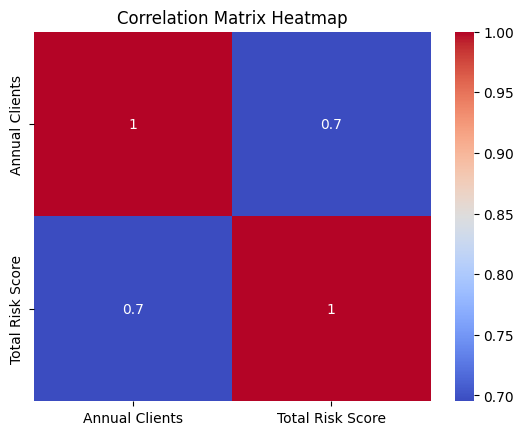

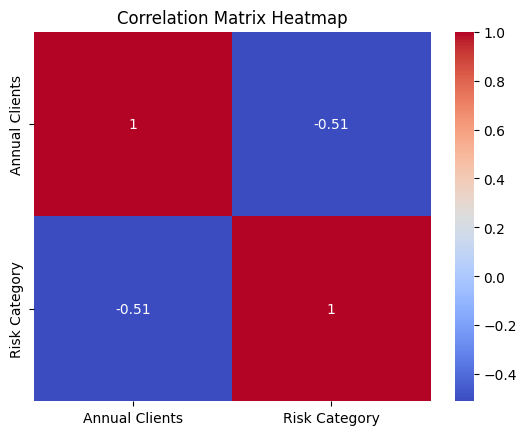

'Creating these two matrices the conclusion is that risk score is greatly corrilated with annual clients while risk category is less corrilated.This is because for risk score, the correlation is 0.7 which means a higher correlation. For risk category, the correlation is -0.51 which means an inverse relationship'

In [128]:
# Share the working code here, and explain your reasoning behind
correlation_matrix_risk_score = data_cleaned[['Annual Clients', 'Total Risk Score']].corr()
correlation_matrix_risk_score
sns.heatmap(correlation_matrix_risk_score, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


correlation_matrix_risk_category = data_cleaned[['Annual Clients', 'Risk Category']].corr()
correlation_matrix_risk_category
sns.heatmap(correlation_matrix_risk_category, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

'''Creating these two matrices the conclusion is that risk score is greatly corrilated with annual clients while risk category is less corrilated.''' '''This is because for risk score, the correlation is 0.7 which means a higher correlation. For risk category, the correlation is -0.51 which means an inverse relationship'''


Does the sentiment analysis correlated with public complains ?

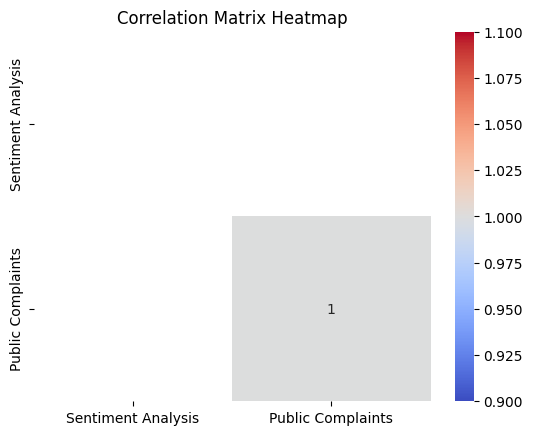

' By looking at this correlation matrix we can come to the conclusion there there is no correlation between the sentiment analysis and public complains'

In [76]:
# Share the working code here, and explain your reasoning behind

correlation_matrix_sentiment = data_cleaned[['Sentiment Analysis', 'Public Complaints']].corr()
correlation_matrix_sentiment
sns.heatmap(correlation_matrix_sentiment, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

''' By looking at this correlation matrix we can come to the conclusion there there is no correlation between the sentiment analysis and public complains'''